<a href="https://colab.research.google.com/github/Santhoshikontheti/Eniac-Discount-Strategy/blob/main/ENIAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 3 ENIAC

In [ ]:
import pandas as pd

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)
# orders_qu.csv
url = "https://drive.google.com/file/d/1VipZtO5K2izo9m7FKGxVbJllwZeVRIv8/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)
# orderlines_qu.csv
url = "https://drive.google.com/file/d/1k9aF2w_E716qzVBk7LCkG5zH0NUdSygx/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)
#
#url = "https://drive.google.com/file/d/1G5nBw-mR7WOxgYd1I6Vo7NRTIXZEl-2d/view?usp=sharing"
#path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
#productscategories = pd.read_csv(path)


In [ ]:
products_cl

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [ ]:
#price category
#Define the bins and labels
bins = [0, 50, 100, 200, 500, float('inf')]
labels = ['very low price', 'low price', 'medium price', 'high price', 'expensive price']

# Create a new column 'price_category' based on 'unit_price'
products_cl['price_category'] = pd.cut(products_cl['price'], bins=bins, labels=labels, right=False)

# Add a new column 'price_label' based on 'price_category'
label_mapping = {
    'very low price': 'A',
    'low price': 'B',
    'medium price': 'C',
    'high price': 'D',
    'expensive price': 'E'
}
products_cl['price_label'] = products_cl['price_category'].map(label_mapping)

# Display the resulting DataFrame
products_cl

,sku,name,desc,price,in_stock,type,price_category,price_label
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,low price,B
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,low price,B
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,low price,B
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,very low price,A
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,very low price,A
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,very low price,A
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low price,B
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,low price,B
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,low price,B


In [ ]:
product_category_df = products_cl.copy()

In [ ]:
# categories by type
product_category_df.loc[product_category_df["type"] == "11865403", "category"] = "iPhone case"
product_category_df.loc[product_category_df["type"] == "12175397", "category"] = "NAS server"
product_category_df.loc[product_category_df["type"] == "1298", "category"] = "open (variable)"
product_category_df.loc[product_category_df["type"] == "11935397", "category"] = "External Storage|Drive"
product_category_df.loc[product_category_df["type"] == "11905404", "category"] = "Drones|Games|Toys|Gadgets"
product_category_df.loc[product_category_df["type"] == "1282", "category"] = "Apple (Mac,Mini,Retina)"
product_category_df.loc[product_category_df["type"] == "12635403", "category"] = "iPad case"
product_category_df.loc[product_category_df["type"] == "13835403", "category"] = "MacBook case"
product_category_df.loc[product_category_df["type"] == "5,74E+15", "category"] = "iMac|Desktop"
product_category_df.loc[product_category_df["type"] == "1364", "category"] = "RAM"
product_category_df.loc[product_category_df["type"] == "12585395", "category"] = "Adapters"
product_category_df.loc[product_category_df["type"] == "1296", "category"] = "Monitor"
product_category_df.loc[product_category_df["type"] == "1325", "category"] = "Cables"
product_category_df.loc[product_category_df["type"] == "5384", "category"] = "Headphones"
product_category_df.loc[product_category_df["type"] == "1433", "category"] = "SSD MacMini"
product_category_df.loc[product_category_df["type"] == "12215397", "category"] = "SSD MacBook"
product_category_df.loc[product_category_df["type"] == "5398", "category"] = "Speaker"
product_category_df.loc[product_category_df["type"] == "1,02E+12", "category"] = "MacBook Pro"
product_category_df.loc[product_category_df["type"] == "1,44E+11", "category"] = "Repair service"
product_category_df.loc[product_category_df["type"] == "57445397", "category"] = "Memory card"
product_category_df.loc[product_category_df["type"] == "1334", "category"] = "Routers"
product_category_df.loc[product_category_df["type"] == "2158", "category"] = "MacBook Pro"
product_category_df.loc[product_category_df["type"] == "2449", "category"] = "Strap AppleWatch"
product_category_df.loc[product_category_df["type"] == "12655397", "category"] = "External Storage|Drive"
product_category_df.loc[product_category_df["type"] == "1229", "category"] = "Digital Pen|Pointer"
product_category_df.loc[product_category_df["type"] == "12995397", "category"] = "Dock|Chassis (storage)"
product_category_df.loc[product_category_df["type"] == "1515", "category"] = "External Battery"
product_category_df.loc[product_category_df["type"] == "13615399", "category"] = "Chargers"
product_category_df.loc[product_category_df["type"] == "13555403", "category"] = "Screen protector"
product_category_df.loc[product_category_df["type"] == "1405", "category"] = "Graphics tablet"

In [ ]:
product_category_df["category"] = ""
#Pheripherals
product_category_df.loc[product_category_df["desc"].str.contains("keyboard|mouse", case=False), "category"] += ", Pheripherals"
#Smartphone
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] += ", Smartphone"
#Ipod
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += ", iPod"
#Tablets
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += ", Tablet"
product_category_df.loc[product_category_df["desc"].str.contains("^.{0,7}apple ipad|tablet|graphic display", case=False), "category"] += ", Tablet"
#Smart notes
product_category_df.loc[product_category_df["name"].str.contains("Wacom|Moleskine|notebook", case=False), "category"] += ", Smart notes"
#Laptop
product_category_df.loc[(product_category_df["name"].str.contains("iMac", case=False)) & (product_category_df["price"] > 400), "category"] += ", Laptop"
#computers
product_category_df.loc[(product_category_df["name"].str.contains("macbook|Mac mini", case=False)) & (product_category_df["price"] > 400), "category"] += ", Computer"
product_category_df.loc[(product_category_df["type"].str.contains("1282", case=False)) & (product_category_df["price"] > 400), "category"] += ", Computer"

#monitors
product_category_df.loc[product_category_df["desc"].str.contains("monitor|BenQ", case=False), "category"] += ", Monitor"
#Sound
product_category_df.loc[product_category_df["name"].str.contains("speakers|speaker|Headset|Headphone|Headphones|earphones|buds|in-ear|ear|Beats|microphone|sound|music|soundtouch|mic|acoustic|recording", case=False), "category"] += ", Sound"
product_category_df.loc[product_category_df["desc"].str.contains("speakers|speaker|Headset|Headphone|Headphones|earphones|buds|in-ear|ear|Beats|microphone|sound|music|soundtouch|mic|acoustic|recording", case=False), "category"] += ", Sound"
#Networking
product_category_df.loc[product_category_df["desc"].str.contains("router|switch|repeater|access point|amplifier|d-link|network|powerline|extenders|extender", case=False), "category"] += ", Network"
#Server
product_category_df.loc[product_category_df["name"].str.contains("NAS|raid|qnas|synology|qnap|cloud", case=False), "category"] += ", Server"
product_category_df.loc[product_category_df["desc"].str.contains("NAS|raid|qnas|synology|qnap|cloud", case=False), "category"] += ", Server"
#Acessories
product_category_df.loc[product_category_df["desc"].str.contains("cleaner|cleaners|printer|lens|belt|anti glare|protector|locator|tracker|charging|mount|holster|holsters|gloves|thermometer|support|spotlight ring|fan|screen saver|screen protector|leather case|case|cover|silicone case|protection|protective|pointer|screen cleaner|mat|stand|dock|holder|replacement|tips|external battery|battery|Backpack|trackpad|bracelet|band|keypad|Tempered Glass|Hub|controller|charger|display cleaner|strap|clip|Acessory", case=False), "category"] += ", Acessories"
product_category_df.loc[product_category_df["name"].str.contains("cleaner|cleaners|printer|lens|belt|anti glare|protector|locator|tracker|charging|mount|holster|holsters|gloves|thermometer|enclosure|scale|support|spotlight ring|fan|screen saver|screen protector|leather case|case|cover|silicone case|protection|protective|pointer|screen cleaner|mat|stand|dock|holder|replacement|tips|external battery|battery|Backpack|trackpad|bracelet|band|keypad|Tempered Glass|Hub|controller|charger|display cleaner|strap|clip|Acessory", case=False), "category"] += ", Acessories"
#Memory
product_category_df.loc[product_category_df["name"].str.contains("memory|drive|ssd|hdd|storage|datatraveler", case=False), "category"] += ", Memory"
product_category_df.loc[product_category_df["desc"].str.contains("memory|drive|ssd|hdd|hard drive|solid state|SDHC|SDXC|cards|card|usb stick|usb memory|usb-c memory|usb-c stick|storage|External hard disk|USB 2.0 key|USB 3.0 key", case=False), "category"] += ", Memory"
#Smart Watches
product_category_df.loc[product_category_df["name"].str.contains("watch|fitbit|apple watch|clock", case=False), "category"] += ", Smart watch"
#Replacement and Repairs
product_category_df.loc[product_category_df["name"].str.contains("enclosure|scale|iFixit|repair|tools|replacement|tool|warranty|applecare", case=False), "category"] += ", Replacement parts & repair service"
#Cables and Adapters
product_category_df.loc[product_category_df["desc"].str.contains("cable|adapter|Magsafe|Thunderbolt|DVI|VGA|card adapter|power strip|DisplayPort to HDMI", case=False), "category"] += ", Cables & adapters"
product_category_df.loc[product_category_df["name"].str.contains("cable|adapter|Magsafe|Thunderbolt|DVI|VGA|card adapter|power strip|DisplayPort to HDMI", case=False), "category"] += ", Cables & adapters"
#Smart home
product_category_df.loc[product_category_df["desc"].str.contains("Hue|Philips Hue|lamp|controlled lighting|lock|padlock|keys|LED|bulb|alarm|alarms|house|sensor|surveillance|smoke detector|carbon monoxide|outlets|lights", case=False), "category"] += ", Smart Home"
#Drones
product_category_df.loc[product_category_df["name"].str.contains("drone|drones|minidrone|minidrones|remote controlled|helicopter", case=False), "category"] += ", Drones"
#Gaming
product_category_df.loc[product_category_df["name"].str.contains("gaming|game|console|PS5|Xbox|Nintendo|Virtual reality", case=False), "category"] += ", Gaming"
#Software
product_category_df.loc[product_category_df["desc"].str.contains("software|Windows|Adobe|virus|anti-virus|antivirus", case=False), "category"] += ", Software"
#media player
product_category_df.loc[product_category_df["desc"].str.contains("DVD|media player|recorder|bluray", case=False), "category"] += ", Media player"
#video
product_category_df.loc[product_category_df["desc"].str.contains("camera|webcam|gopro|action camera|cameras", case=False), "category"] += ", Video"
#Second hand
product_category_df.loc[product_category_df["name"].str.contains("Like new|refurbished|second hand|second-hand|open", case=False), "category"] += ", Second-hand"


In [ ]:
def remove_duplicate_categories(df, category_to_check):
    df["category"] = df["category"].apply(lambda x: remove_duplicates(x, category_to_check))
    return df

def remove_duplicates(categories, category_to_check):
    category_list = [category.strip() for category in categories.split(',')]
    category_set = set()

    for i, category in enumerate(category_list):
        if category in category_set:
            category_list[i] = ""
        else:
            category_set.add(category)

    # Remove empty strings and join the categories
    category_list = [category for category in category_list if category]
    return ', '.join(category_list)

# Example usage for removing duplicates of ", Sound"
product_category_df = remove_duplicate_categories(product_category_df, "Sound")
product_category_df = remove_duplicate_categories(product_category_df, "Acessories")
product_category_df = remove_duplicate_categories(product_category_df, "Tablet")
product_category_df = remove_duplicate_categories(product_category_df, "Server")
product_category_df = remove_duplicate_categories(product_category_df, "Cables & adapters")


In [ ]:
#merging appropiate columns from orderlines to prodcuts table

oltomerge = orderlines_qu[['sku','id_order','unit_price','date']]
productswithol = product_category_df.merge(oltomerge, how="inner", on="sku")


#creating "discount" column
productswithol['discount'] = productswithol['price']-productswithol['unit_price']

#adding boolean variable, wether a product had a discount or not

productswithol['has_promo'] = productswithol['price']>productswithol['unit_price']

In [ ]:
#creating a new orderlines table
orderlines_weeks = orderlines_qu.copy()


In [ ]:
# adding day, month, year and quarter columns to dates
productswithol["date"] = pd.to_datetime(productswithol["date"])
orderlines_weeks["date"] = pd.to_datetime(orderlines_weeks["date"])
productswithol.loc[:,"month"] = productswithol["date"].dt.month
orderlines_weeks.loc[:,"month"] = orderlines_weeks["date"].dt.month
productswithol.loc[:,"year"] = productswithol["date"].dt.year
orderlines_weeks.loc[:,"year"] = orderlines_weeks["date"].dt.year
productswithol.loc[:,"day"] = productswithol["date"].dt.day
orderlines_weeks.loc[:,"day"] = orderlines_weeks["date"].dt.day
productswithol.loc[:,"quarter"] = productswithol["date"].dt.quarter
orderlines_weeks.loc[:,"quarter"] = orderlines_weeks["date"].dt.quarter
productswithol.loc[:,"week"] = productswithol["date"].dt.week
orderlines_weeks.loc[:,"week"] = orderlines_weeks["date"].dt.week



<ipython-input-9-62c7843ff20d>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  productswithol.loc[:,"week"] = productswithol["date"].dt.week
<ipython-input-9-62c7843ff20d>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orderlines_weeks.loc[:,"week"] = orderlines_weeks["date"].dt.week


In [ ]:
orderlines_weeks['price_total'] = orderlines_weeks['product_quantity']*orderlines_weeks['unit_price']

In [ ]:
#creating a column "discountpct", showing the % of the discount from original price
productswithol['discountpct'] = (productswithol['discount']*100)/productswithol['price']

In [ ]:
#adding categories of discount percentages
productsnoneg['discountcategory'] = ""
productsnoneg.loc[productsnoneg['discountpct']>=50, 'discountcategory'] = "aggressive discount"
productsnoneg.loc[productsnoneg['discountpct']<50, 'discountcategory'] = "high discount"
productsnoneg.loc[productsnoneg['discountpct']<25, 'discountcategory'] = "medium discount"
productsnoneg.loc[productsnoneg['discountpct']<10, 'discountcategory'] = "low discount"

In [ ]:
#Removing productswith negative discounts
negdiscountlist = productswithol.loc[productswithol["discount"]<-1]['id_order']
productsnoneg = productswithol.loc[~(productswithol['id_order'].isin(negdiscountlist))]


In [ ]:
#creating a list of top10 selling products (by sku)

mostsales = productswithol.groupby('sku',as_index=False)['id_order'].count()
toptensales = mostsales.sort_values(by="id_order", ascending=False).head(10)['sku']
toptensales

#creating a list of most sales per distict discount

salesperdiscount = productsnoneg.groupby(['sku','discount']).agg({'id_order': 'count'})
salesperdiscount.sort_values(by='discount')

,,id_order
sku,discount,
KIN0120,-1.00,1
PAC1317,-1.00,1
SAM0073,-1.00,3
LAC0205,-0.99,2
LAC0224,-0.99,3
...,...,...
PAC2062,1163.41,1
PAC2281,1243.41,1
PAC2065,1300.00,1


In [ ]:
#getting the top10 most sold items per sum-sold
orderlines_weeks['total_unit_price'] = orderlines_weeks['product_quantity']*orderlines_weeks['unit_price']
revenuedf = orderlines_weeks.groupby('sku')[['total_unit_price']].sum()
revenuedf.total_unit_price.nlargest(10)

sku
LGE0044    135375.83
APP2446    104560.64
APP1922     86473.26
APP2477     85301.93
APP1970     80715.76
APP2072     74964.06
APP2485     70721.79
WDT0183     65589.96
APP2483     60090.08
APP2479     52981.19
Name: total_unit_price, dtype: float64

#Graphs

Yearly Overview Graph

In [ ]:


from scipy.interpolate import interp1d
import numpy as np
# Assuming APP1970_qty and APP1970_discount are your dataframes with the relevant data.
# Ensure that 'week' is a numeric and no duplicates are present.
yearlynumb['week'] = pd.to_numeric(yearlynumb['week'], errors='coerce')


# Remove NaN values that could result from conversion errors
yearlynumb.dropna(subset=['week','product_quantity'],
                  inplace=True)


# Remove duplicates
yearlynumb = yearlynumb.drop_duplicates(subset='week')


# Sorting by 'week' to ensure the correct order
yearlynumb.sort_values('week',
                        inplace=True)


# Function to perform spline interpolation
def spline_interpolate(df, x_col, y_col, kind='cubic'):
    x = df[x_col].astype(float)
    y = df[y_col].astype(float)
    # Create a spline interpolation of the data
    spline = interp1d(x,
                      y,
                      kind=kind,
                      fill_value='extrapolate')
    # Generate more x values
    xnew = np.linspace(x.min(), x.max(), 300)
    # Generate smoothed y values
    ynew = spline(xnew)
    return xnew, ynew

# Interpolate data for smooth curves
x1yearlynumb, y1yearlynumb = spline_interpolate(yearlynumb,
                                        'week',
                                        'discountpct')
x2yearlynumb, y2yearlynumb = spline_interpolate(yearlynumb,
                                                  'week',
                                                  'price_total')
x3yearlynumb, y3yearlynumb = spline_interpolate(yearlynumb,
                                                  'week',
                                                  'id_order')

# Plotting
fig, ax1 = plt.subplots(figsize=(10,6))

# First axis plot with spline interpolated data
ax1.plot(x1yearlynumb,
         y1yearlynumb,
         label="AVG Discount Pct",
         color="black")
#ax1.scatter(APP1970_qty['week'], APP1970_qty['product_quantity'], color='blue')  # Original data points
ax1.set_ylabel('Average Percentage of Discount',color='black', fontsize=14,
                fontweight='bold')

# Second axis with spline interpolated data
ax2 = ax1.twinx()
ax2.plot(x2yearlynumb,
         y2yearlynumb,
         label="Revenue",
         color="crimson")
#ax2.scatter(APP1970_discount['week'], APP1970_discount['discountpct'], color='black')  # Original data points
ax2.set_ylabel('Revenue in €', color='crimson', fontsize=14,
                fontweight='bold')

ax3 = ax1.twinx()
ax3.plot(x3yearlynumb,
         y3yearlynumb,
         label="# of Orders",
         color="darkorange")
ax3.set_ylabel('Number of Orders', color='darkorange', fontsize=14,
                fontweight='bold')
ax3.spines['right'].set_position(('axes',1.15))



# Create legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3,
           labels + labels2 + labels3,
           loc='upper left',
           title='Legend')
# Placing a line marker for Black Friday
black_friday_date = 47
ax2.axvline(x=black_friday_date, color='grey', linestyle='--', label='Black Friday')
ax2.annotate('Black Friday', xy=(black_friday_date, ax2.get_ylim()[0]), xytext=(black_friday_date, ax2.get_ylim()[0]*2.5),
             fontsize=10, ha='center', va='top');

#File Saving
#plt.savefig('yearlyINT.png', dpi=300, format='png')
#files.download('yearlyINT.png')


Products sold by Discount type/Price Category

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

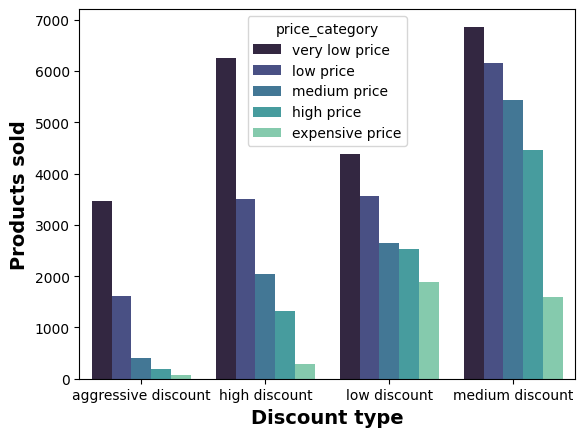

In [ ]:
#Creating DataFrame grouped by Price&Discount category, summing total Products sold
salesbycategory = productsnoneg.groupby(['price_category','discountcategory'],as_index=False)['product_quantity'].sum()

#Plotting the DataFrame
revplot = sns.barplot(data=salesbycategory, x="discountcategory", y="product_quantity", hue="price_category", palette="mako")
plt.ylabel('Total Unit Price')
revplot.set_xlabel('Discount type',
                fontsize=14,
                fontweight='bold',
                color='black'
                )
revplot.set_ylabel('Products sold',
                fontsize=14,
                fontweight='bold',
                color='black'
                )
;

#File Saving
#plt.savefig('discounts.png', dpi=300, format='png')
#files.download('discounts.png')